In [168]:
# Import pandas  
import pandas as pd
# Import NumPy for numerical operations
import numpy as np  
# Import matplotlib for data visualization
import matplotlib.pyplot as plt  

# Import train_test_split to split dataset into training and testing sets
from sklearn.model_selection import train_test_split  

# Import TfidfVectorizer to convert text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer  
# Import PassiveAggressiveClassifier for online learning text classification
from sklearn.linear_model import PassiveAggressiveClassifier  

# Import Logistic Regression for classification tasks
from sklearn.linear_model import LogisticRegression  
# Import Support Vector Classifier (SVC) for classification tasks
from sklearn.svm import SVC  

# Import Random Forest Classifier (ensemble method for classification)
from sklearn.ensemble import RandomForestClassifier  
# Import metrics to evaluate model performance
from sklearn.metrics import accuracy_score , confusion_matrix  

# Import Multinomial Naive Bayes for text classification
from sklearn.naive_bayes import MultinomialNB  
# Import CountVectorizer to convert text into word count features
from sklearn.feature_extraction.text import CountVectorizer  


In [169]:
df = pd.read_csv('vaccination_tweets.csv') # load dataset

In [170]:
df.info()  # show dataset summary (columns, types, nulls, memory)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [171]:
df.describe()  # show statistical summary of numeric columns

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,1.372977e+18,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,3.311622e+16,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347623e+18,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,1.360274e+18,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,1.395234e+18,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.463244e+18,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


In [172]:
df.columns  # list all column names in the dataset

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [173]:
df.head()  # display first 5 rows of the dataset


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [174]:
print(df.isnull().sum())  # check missing values in each column


id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [175]:
print(df.columns.tolist())


['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']


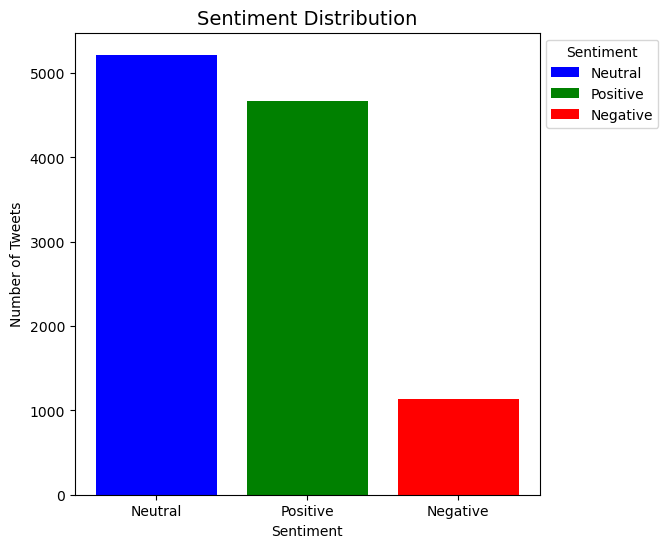

In [176]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

# --- Example: sentiment function ---
def get_sentiment(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# --- Apply sentiment analysis ---
df['sentiment'] = df['text'].apply(get_sentiment)

# --- Count sentiment distribution ---
class_distribution = df['sentiment'].value_counts()

# --- Plot with distinct colors and proper legend ---
fig, ax = plt.subplots(figsize=(6,6))
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

bars = []
labels = []

for sentiment, count in class_distribution.items():
    bar = ax.bar(sentiment, count, color=colors.get(sentiment, 'gray'))
    bars.append(bar)
    labels.append(sentiment)

ax.set_title('Sentiment Distribution', fontsize=14)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Tweets')

# Proper legend with all classes
ax.legend(bars, labels, title='Sentiment', loc='upper right', bbox_to_anchor=(1.27, 1))

plt.show()

 



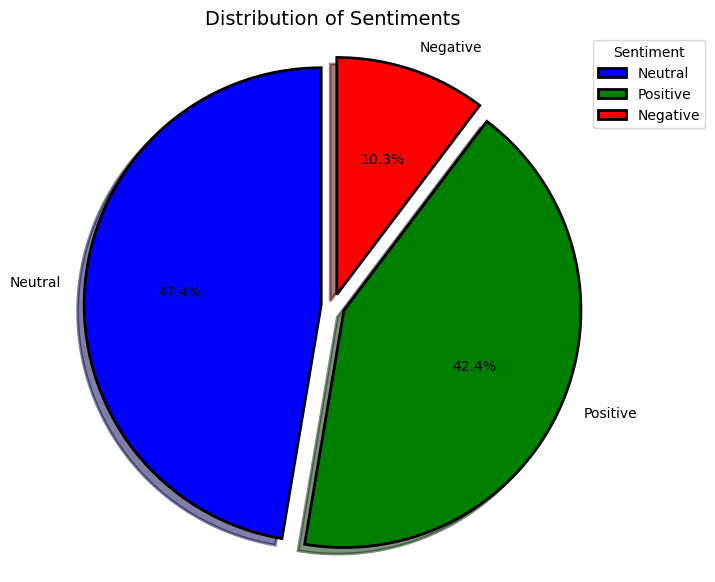

In [177]:
import matplotlib.pyplot as plt

# --- Count the sentiment values ---
tags = df['sentiment'].value_counts()

# --- Define style settings ---
fig = plt.figure(figsize=(7,7))
colors = ("blue", "green", "red")   # Negative, Neutral, Positive (you can reorder)
wp = {'linewidth': 2, 'edgecolor': "black"}
explode = (0.05, 0.05, 0.05)        # Small separation for better look

# --- Plot pie chart ---
tags.plot(
    kind='pie',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    label=''   # remove default label text
)

# --- Add title and equal axis ---
plt.title('Distribution of Sentiments', fontsize=14)
plt.ylabel('')  # hide the y-label
plt.axis('equal')  # keep circle shape
plt.legend(tags.index, title="Sentiment", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()


In [178]:
text_corpus = " ".join(df['text'])

# wordcloud = WordCloud(width=800 ,height=400,random_state=42,background_color='black').generate(text_corpus)

# plt.figure(figsize=(10,6))
# plt.imshow(wordcloud,interpolation='bilinear')

# plt.axis('off')
# plt.title('Word Cloud for english')
# # plt.show()

In [179]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Split into words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop]
    # Join back into a clean sentence
    return " ".join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

#  Use 'sentiment' instead of 'category'
newdf = df[['sentiment', 'cleaned_text']]

print(newdf.head())



[nltk_data] Downloading package stopwords to C:\Users\Waqas
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  sentiment                                       cleaned_text
0   Neutral  folks said daikon paste could treat cytokine s...
1  Negative  world wrong side history year hopefully bigges...
2   Neutral  coronavirus sputnikv astrazeneca pfizerbiontec...
3  Negative  facts immutable senator even youre ethically s...
4   Neutral  explain need vaccine borisjohnson matthancock ...


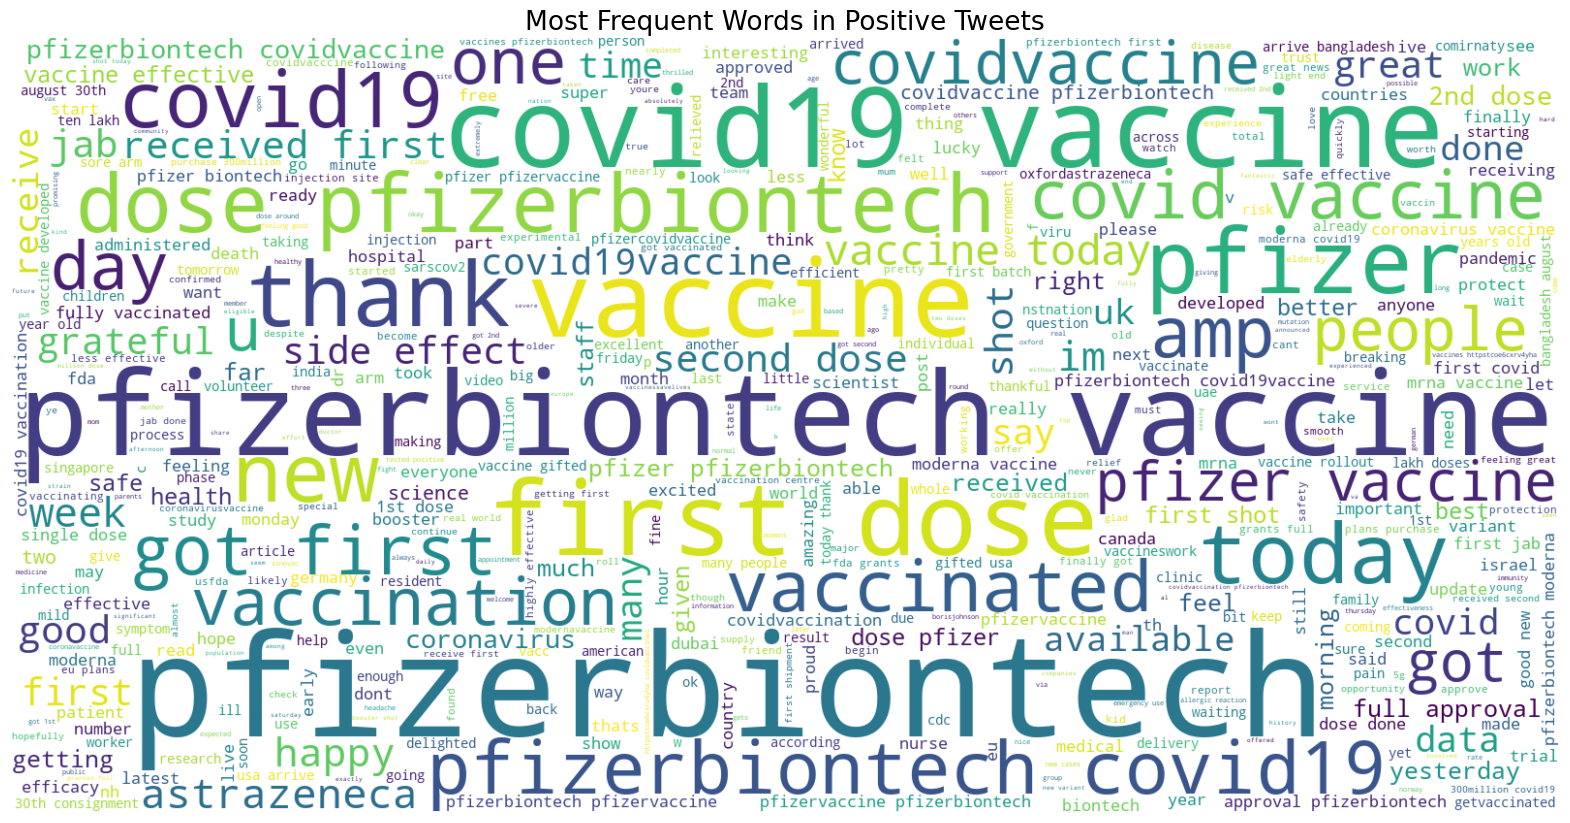

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Make sure pos_tweets exists (filter only positive tweets)
pos_tweets = df[df['sentiment'] == 'Positive']

#  Combine all text into a single string
text = ' '.join(pos_tweets['cleaned_text'])

#  Create the WordCloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(
    max_words=500,
    width=1600,
    height=800,
    background_color='white',   # optional for better visibility
    colormap='viridis'          # you can try 'plasma', 'cool', 'rainbow', etc.
).generate(text)

#  Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Positive Tweets', fontsize=19)
plt.show()




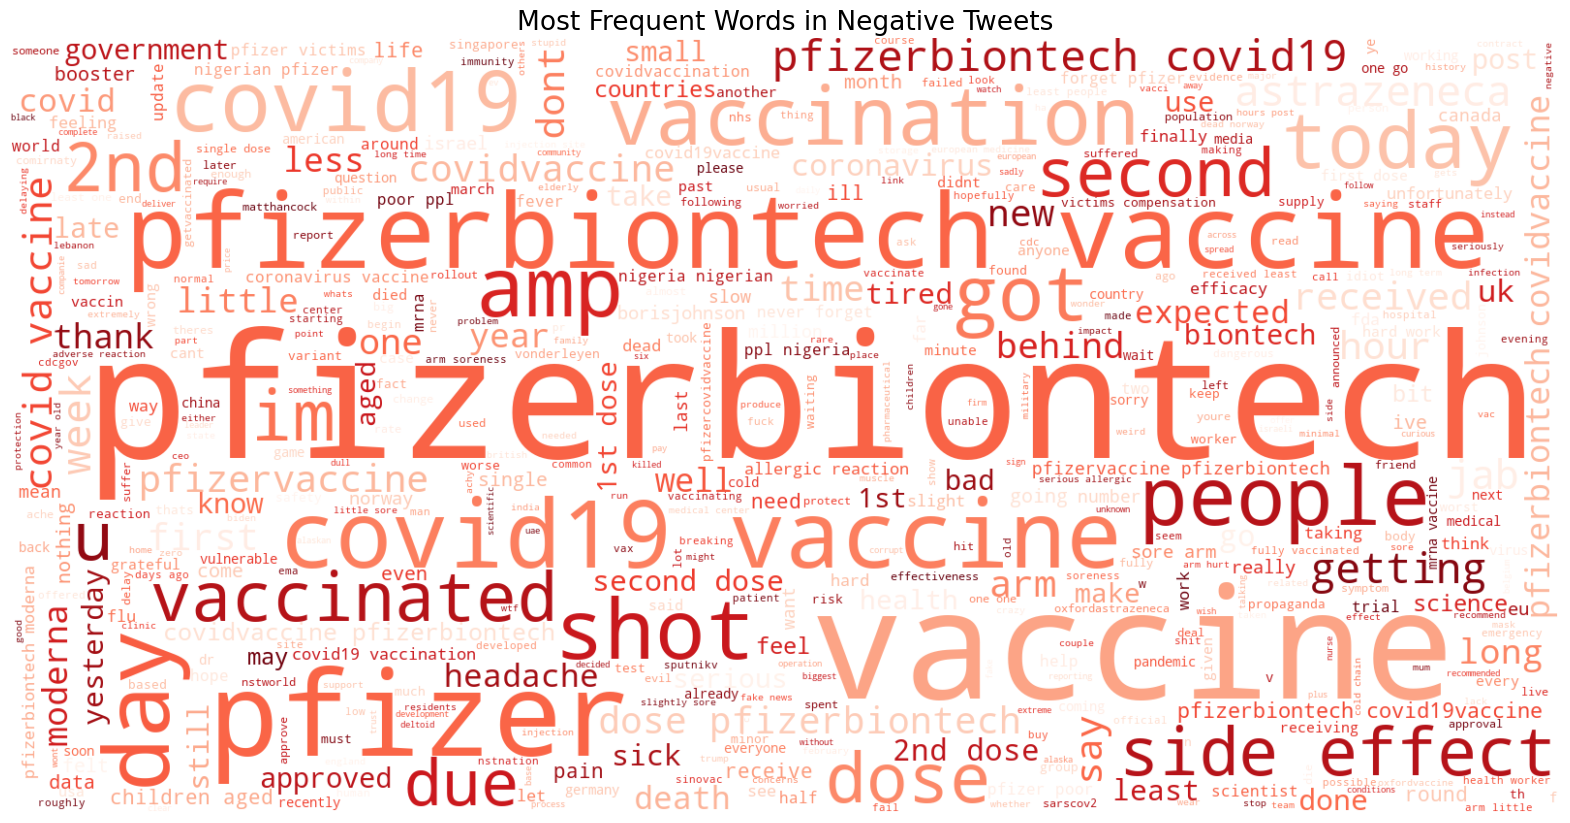

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

neg_tweets = df[df['sentiment'] == 'Negative']
text = ' '.join(neg_tweets['cleaned_text'])

plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(
    max_words=500,
    width=1600,
    height=800,
    background_color='white',
    colormap='Reds'
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Negative Tweets', fontsize=19)
plt.show()




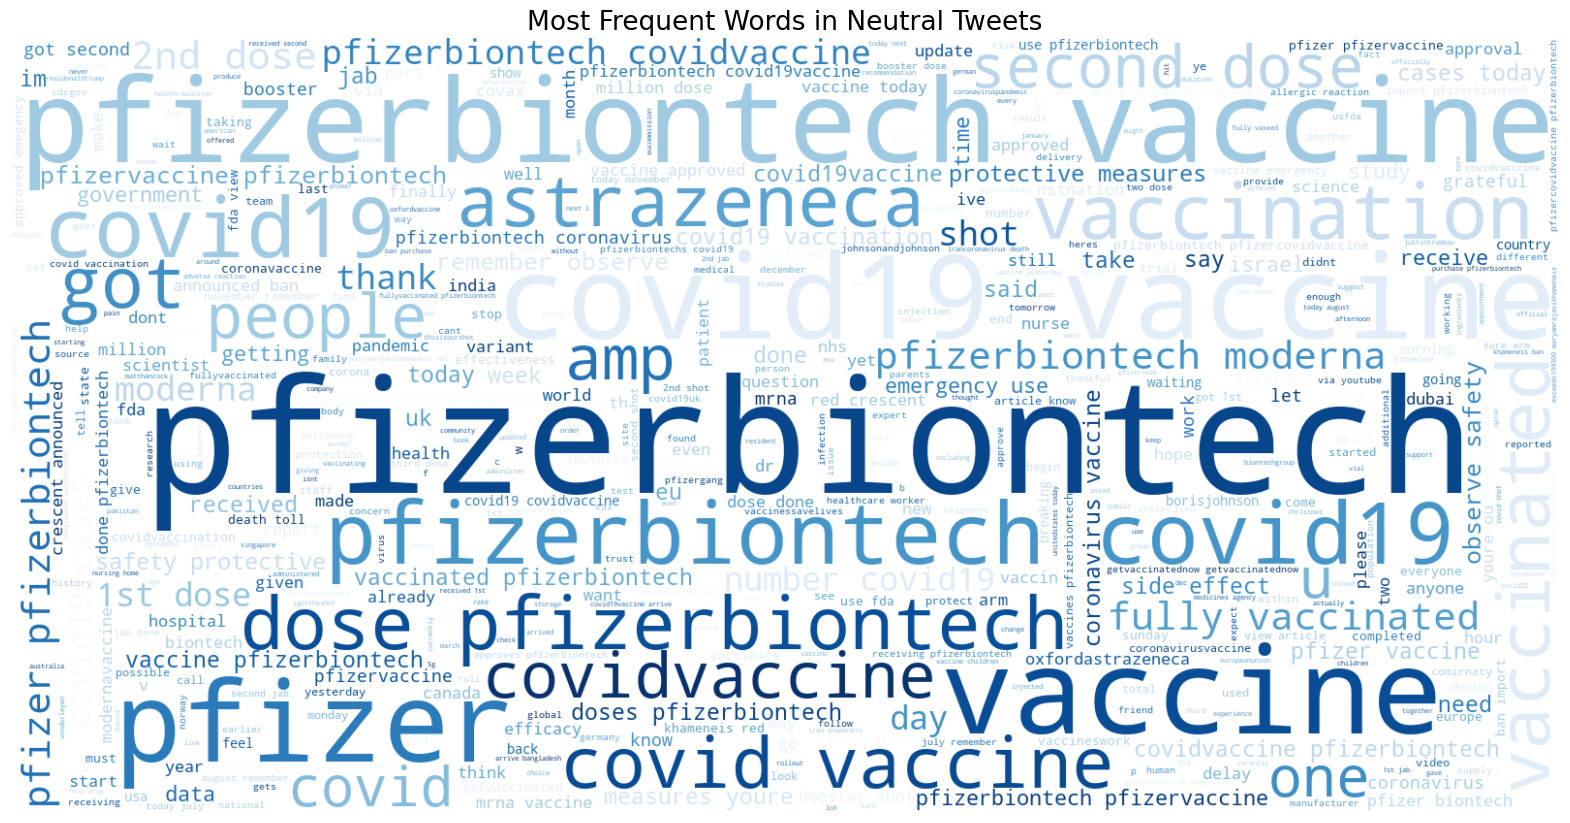

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Filter only neutral tweets
neutral_tweets = df[df['sentiment'] == 'Neutral']

#  Use preprocessed text (cleaned_text) for cleaner results
text = ' '.join(neutral_tweets['cleaned_text'])

#  Generate word cloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(
    max_words=500,
    width=1600,
    height=800,
    background_color='white',
    colormap='Blues'  # blue fits neutral tone nicely
).generate(text)

#  Display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Neutral Tweets', fontsize=19)
plt.show()


In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    newdf['cleaned_text'], 
    newdf['sentiment'], 
    test_size=0.2, 
    random_state=42
)

In [184]:
vectorizer = CountVectorizer(ngram_range=(1,1))  
# use bi-grams (pairs of words)

X_train_vectorizered = vectorizer.fit_transform(X_train)  
# learn vocab from train + transform

X_test_vectorizered = vectorizer.transform(X_test)  
# only transform test (no fitting)

print(X_train_vectorizered.shape)  # rows = samples, cols = features
print(X_test_vectorizered.shape)


(8816, 22984)
(2204, 22984)


In [185]:
# Import classification report to evaluate model performance (precision, recall, F1-score)
from sklearn.metrics import classification_report  

  

In [186]:
# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on training data
classifier.fit(X_train_vectorizered, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test_vectorizered)

# Generate classification report (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

print('#####################################################\n')

# Generate the confusion matrix to evaluate prediction performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_matrix)


              precision    recall  f1-score   support

    Negative       0.79      0.05      0.09       228
     Neutral       0.82      0.77      0.80      1024
    Positive       0.71      0.91      0.80       952

    accuracy                           0.76      2204
   macro avg       0.77      0.58      0.56      2204
weighted avg       0.77      0.76      0.72      2204

#####################################################

[[ 11  84 133]
 [  3 792 229]
 [  0  85 867]]


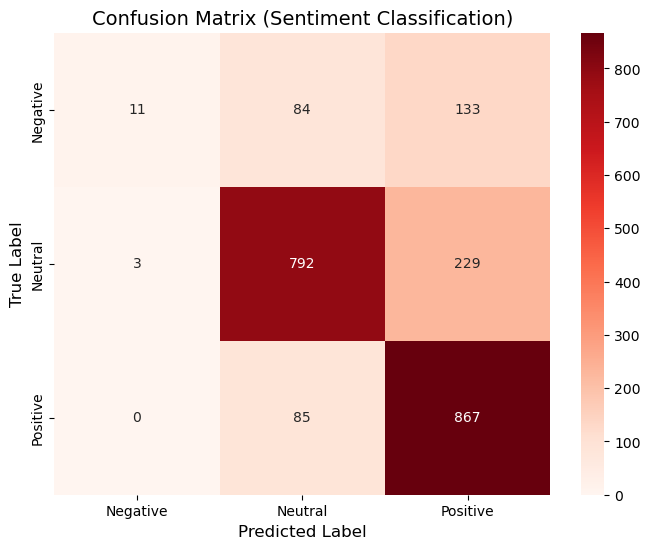

In [187]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a figure for the heatmap
plt.figure(figsize=(8,6))

# Plot heatmap of the confusion matrix
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Reds',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Sentiment Classification)', fontsize=14)

# Show the heatmap
plt.show()






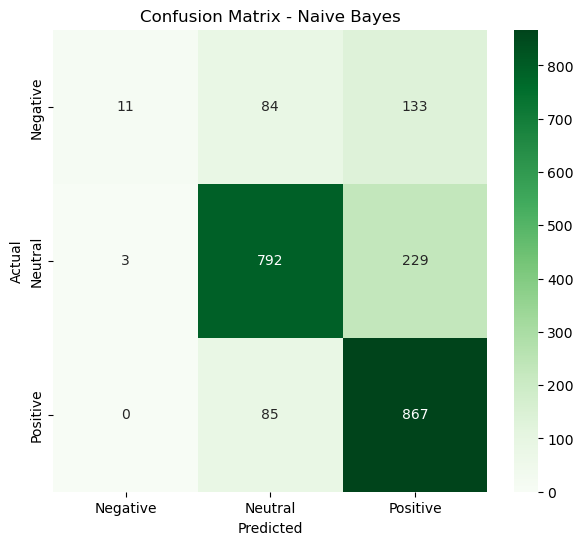


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.05      0.09       228
     Neutral       0.82      0.77      0.80      1024
    Positive       0.71      0.91      0.80       952

    accuracy                           0.76      2204
   macro avg       0.77      0.58      0.56      2204
weighted avg       0.77      0.76      0.72      2204



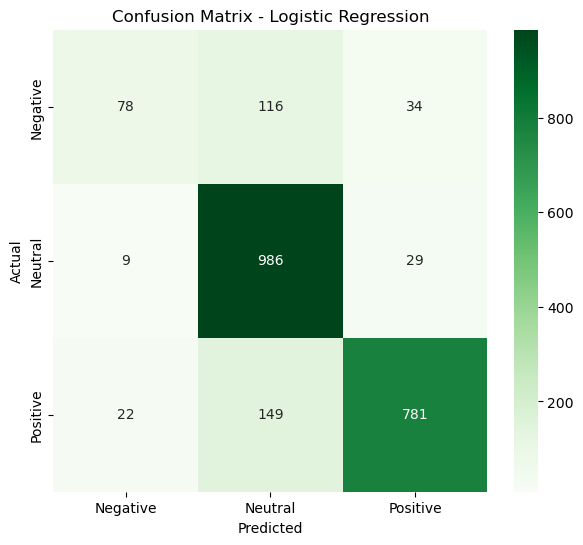


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.34      0.46       228
     Neutral       0.79      0.96      0.87      1024
    Positive       0.93      0.82      0.87       952

    accuracy                           0.84      2204
   macro avg       0.81      0.71      0.73      2204
weighted avg       0.84      0.84      0.83      2204



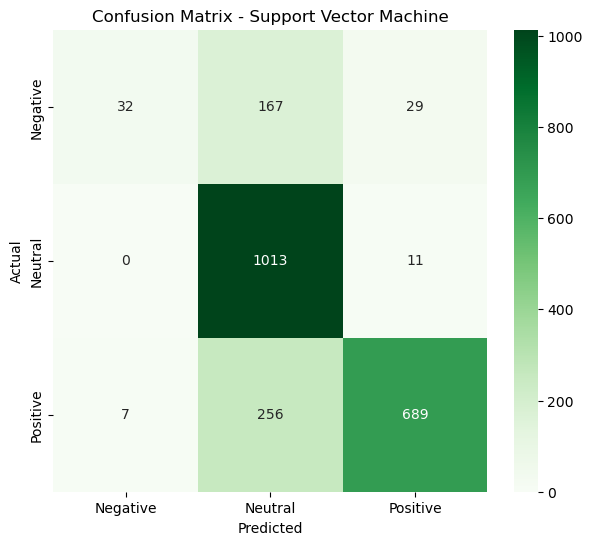


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.14      0.24       228
     Neutral       0.71      0.99      0.82      1024
    Positive       0.95      0.72      0.82       952

    accuracy                           0.79      2204
   macro avg       0.82      0.62      0.63      2204
weighted avg       0.82      0.79      0.76      2204



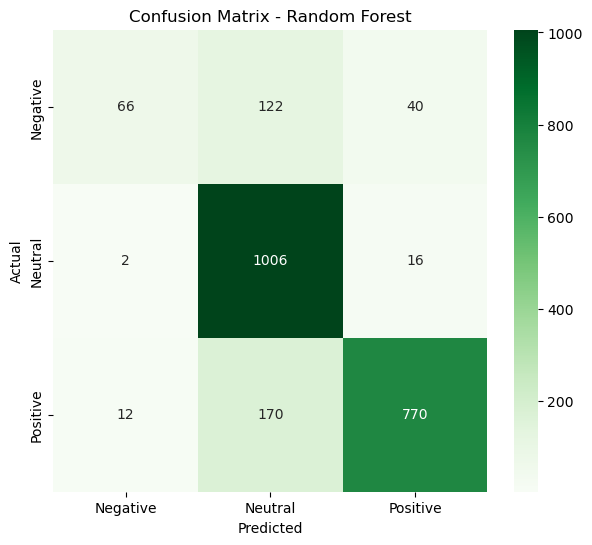


Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.29      0.43       228
     Neutral       0.78      0.98      0.87      1024
    Positive       0.93      0.81      0.87       952

    accuracy                           0.84      2204
   macro avg       0.84      0.69      0.72      2204
weighted avg       0.85      0.84      0.82      2204



<Figure size 1000x600 with 0 Axes>

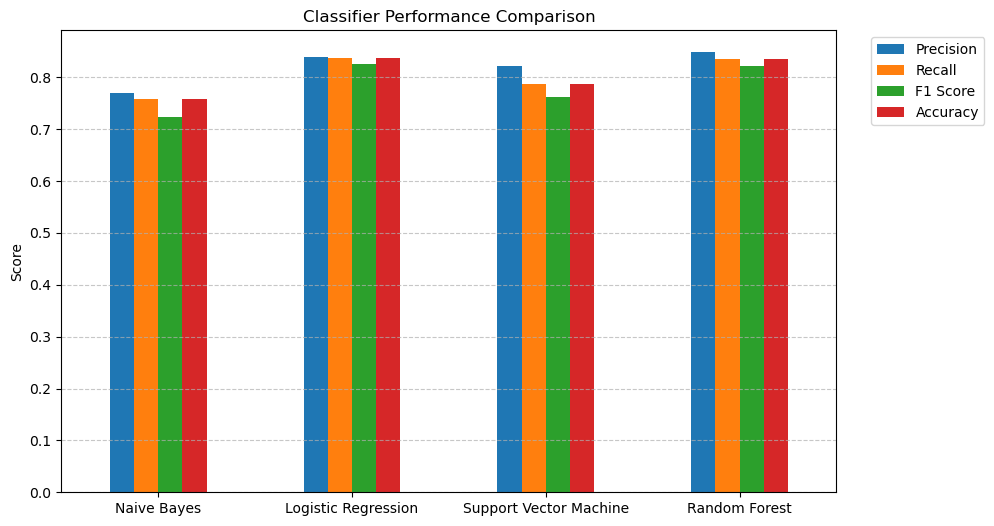


📊 Overall Model Performance Summary:


,Precision,Recall,F1 Score,Accuracy
Naive Bayes,0.768899,0.757713,0.723571,0.757713
Logistic Regression,0.839918,0.837114,0.826281,0.837114
Support Vector Machine,0.820873,0.786751,0.761523,0.786751
Random Forest,0.848093,0.835753,0.821040,0.835753


In [192]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)

# ----------------------------
# Define your classifiers
# ----------------------------
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# ----------------------------
# Storage for all results
# ----------------------------
all_metrics = {}
labels = ['Negative', 'Neutral', 'Positive']

# ----------------------------
# Loop through each classifier
# ----------------------------
for name, classifier in classifiers.items():

    # Train the model
    classifier.fit(X_train_vectorizered, y_train)

    # Predict test data
    y_pred = classifier.predict(X_test_vectorizered)

    # Generate metrics
    report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Store averaged metrics
    metrics = {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score'],
        'Accuracy': accuracy
    }
    all_metrics[name] = metrics

    # ----------------------------
    # Confusion Matrix Visualization
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ----------------------------
    # Print Classification Report
    # ----------------------------
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))

# ----------------------------
# Compare Performance Across All Models
# ----------------------------
metrics_df = pd.DataFrame(all_metrics).T

plt.figure(figsize=(10,6))
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='upper right' ,bbox_to_anchor=(1.20, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ----------------------------
# Display the metrics table
# ----------------------------
print("\n📊 Overall Model Performance Summary:")
display(metrics_df)
